# split trainSet and testSet

In [3]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.datasets import load_iris

(150, 4)


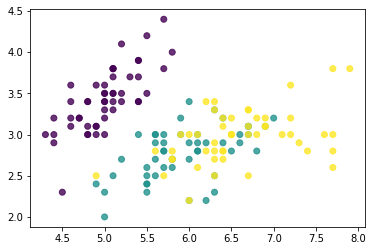

In [4]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)
plt.scatter(X[:,0], X[:,1], c=y, alpha=0.8)

# TrainSet and TestSet

In [6]:
from sklearn.model_selection import train_test_split

### *Split*

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [8]:
print('X_train', X_train.shape)
print('X_test', X_test.shape)

X_train (120, 4)
X_test (30, 4)


Text(0.5, 1.0, 'Test set')

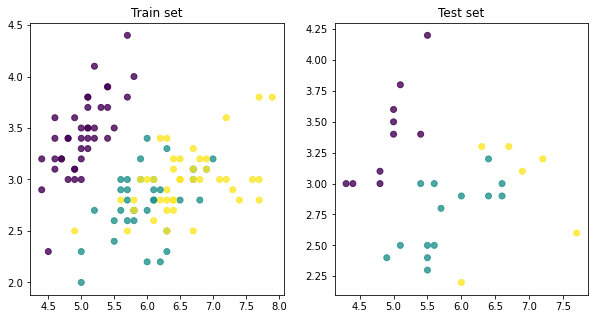

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1], c=y_train, alpha=0.8)
plt.title("Train set")

plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1], c=y_test, alpha=0.8)
plt.title("Test set")

## model

In [10]:
from sklearn.neighbors import KNeighborsClassifier

In [11]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [12]:
model.score(X_train, y_train)

0.9583333333333334

In [13]:
model.score(X_test, y_test)

0.9666666666666667

## **CROSS VALIDATION**

In [14]:
from sklearn.model_selection import cross_val_score

In [15]:
cross_val_score(KNeighborsClassifier(9), X_train, y_train, cv=10, scoring='accuracy').mean()

0.9666666666666666

# **VALIDATION CURVE**

In [16]:
from sklearn.model_selection import validation_curve

In [17]:
model = KNeighborsClassifier()
k = np.arange(1,50)

train_score, val_score = validation_curve(model, X_train, y_train, param_name='n_neighbors',param_range= k, cv=10)

In [18]:
train_score.shape, val_score.shape

((49, 10), (49, 10))

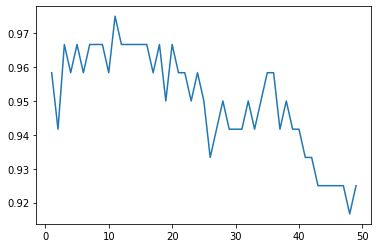

In [19]:
plt.plot(k, val_score.mean(axis=1))

# **GridSearchCV**

In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
param_grid = {'n_neighbors': np.arange(1, 20), 'metric': ['euclidean','manhattan']}

In [22]:
grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=5)

In [23]:
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [24]:
grid.best_score_

0.975

In [25]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 7}

In [26]:
model = grid.best_estimator_

In [27]:
model.score(X_test, y_test)

1.0

# **learning_curve**

In [28]:
from sklearn.model_selection import learning_curve

In [29]:
learning_curve(model, X_train, y_train, cv=5)

(array([ 9, 31, 52, 74, 96]),
 array([[0.88888889, 0.44444444, 0.44444444, 0.44444444, 0.44444444],
        [0.90322581, 0.90322581, 0.96774194, 0.96774194, 0.96774194],
        [0.96153846, 0.96153846, 1.        , 0.94230769, 0.94230769],
        [0.95945946, 0.98648649, 0.98648649, 0.97297297, 0.98648649],
        [0.97916667, 0.96875   , 0.97916667, 0.96875   , 0.97916667]]),
 array([[0.625     , 0.29166667, 0.29166667, 0.29166667, 0.29166667],
        [0.83333333, 0.95833333, 0.95833333, 0.95833333, 0.95833333],
        [0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.95833333],
        [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333],
        [1.        , 1.        , 0.95833333, 0.95833333, 0.95833333]]))